<a href="https://colab.research.google.com/github/SaiDhanyaa/ExcelR_Assignments/blob/main/ASSIGNMENT_17_NAIVEBAYES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Prepare a classification model using Naive Bayes for salary data**

**Data Description:**

age -- age of a person

workclass	-- A work class is a grouping of work

education	-- Education of an individuals

maritalstatus -- Marital status of an individulas	

occupation	 -- occupation of an individuals

relationship -- 	

race --  Race of an Individual

sex --  Gender of an Individual

capitalgain --  profit received from the sale of an investment	

capitalloss	-- A decrease in the value of a capital asset

hoursperweek -- number of hours work per week	

native -- Native of an individual

Salary -- salary of an individual


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
Test_df = pd.read_csv('SalaryData_Test.csv')
Train_df = pd.read_csv('SalaryData_Train.csv')

In [ ]:
Test_df.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [ ]:
Train_df.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


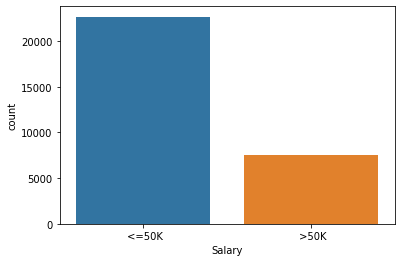

In [ ]:
import seaborn as sns
sns.countplot(x=Train_df['Salary'])

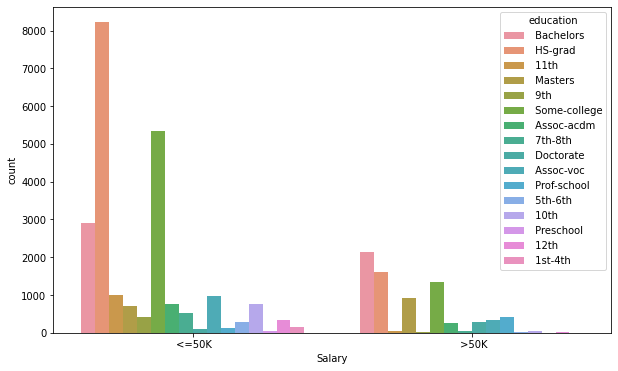

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x=Train_df['Salary'], hue=Train_df['education'])

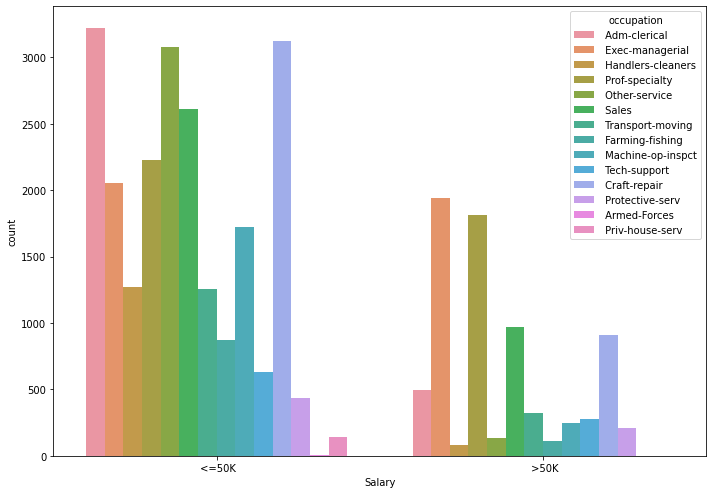

In [ ]:
from matplotlib import rcParams
rcParams['figure.figsize']= 11.7,8.27
sns.countplot(x=Train_df['Salary'], hue=Train_df['occupation']);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


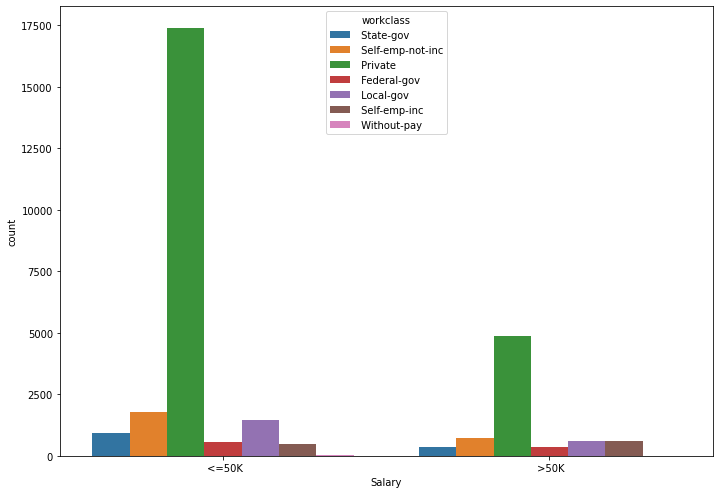

In [ ]:
sns.countplot(Train_df['Salary'], hue=Train_df['workclass']);

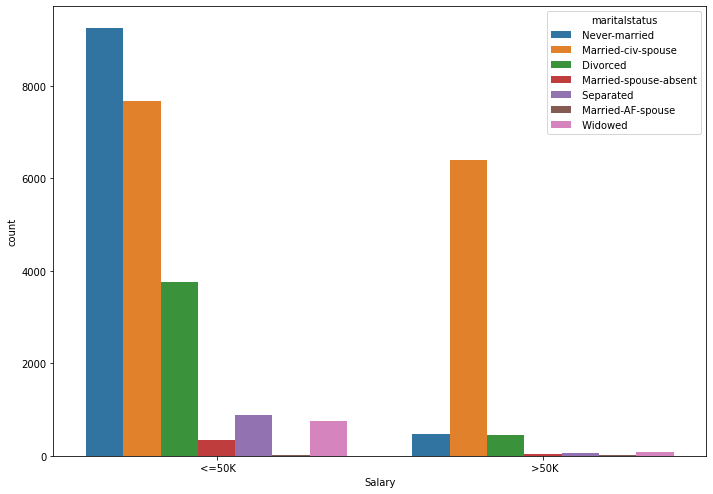

In [ ]:
sns.countplot(x=Train_df['Salary'], hue=Train_df['maritalstatus'])

**Label Encoding**

In [ ]:
from sklearn.preprocessing import LabelEncoder
Labelencoder_df = LabelEncoder()
Train_df['Salary']= Labelencoder_df.fit_transform( Train_df['Salary'])
Test_df["Salary"] = Labelencoder_df.fit_transform(Test_df['Salary'])

In [ ]:
Train_df.head(10)

In [ ]:
Test_df.head()

**OneHot Encoding**

In [ ]:
df_train = pd.get_dummies(Train_df)
df_test = pd.get_dummies(Test_df)

In [ ]:
df_train.head()

,age,educationno,capitalgain,capitalloss,hoursperweek,Salary,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_ 10th,education_ 11th,education_ 12th,education_ 1st-4th,education_ 5th-6th,education_ 7th-8th,education_ 9th,education_ Assoc-acdm,education_ Assoc-voc,education_ Bachelors,education_ Doctorate,education_ HS-grad,education_ Masters,education_ Preschool,education_ Prof-school,education_ Some-college,maritalstatus_ Divorced,maritalstatus_ Married-AF-spouse,maritalstatus_ Married-civ-spouse,maritalstatus_ Married-spouse-absent,maritalstatus_ Never-married,maritalstatus_ Separated,maritalstatus_ Widowed,occupation_ Adm-clerical,occupation_ Armed-Forces,occupation_ Craft-repair,occupation_ Exec-managerial,...,native_ Cambodia,native_ Canada,native_ China,native_ Columbia,native_ Cuba,native_ Dominican-Republic,native_ Ecuador,native_ El-Salvador,native_ England,native_ France,native_ Germany,native_ Greece,native_ Guatemala,native_ Haiti,native_ Honduras,native_ Hong,native_ Hungary,native_ India,native_ Iran,native_ Ireland,native_ Italy,native_ Jamaica,native_ Japan,native_ Laos,native_ Mexico,native_ Nicaragua,native_ Outlying-US(Guam-USVI-etc),native_ Peru,native_ Philippines,native_ Poland,native_ Portugal,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia
0,39,13,2174,0,40,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,50,13,0,0,13,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,38,9,0,0,40,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,53,7,0,0,40,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,28,13,0,0,40,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_test.head()

,age,educationno,capitalgain,capitalloss,hoursperweek,Salary,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_ 10th,education_ 11th,education_ 12th,education_ 1st-4th,education_ 5th-6th,education_ 7th-8th,education_ 9th,education_ Assoc-acdm,education_ Assoc-voc,education_ Bachelors,education_ Doctorate,education_ HS-grad,education_ Masters,education_ Preschool,education_ Prof-school,education_ Some-college,maritalstatus_ Divorced,maritalstatus_ Married-AF-spouse,maritalstatus_ Married-civ-spouse,maritalstatus_ Married-spouse-absent,maritalstatus_ Never-married,maritalstatus_ Separated,maritalstatus_ Widowed,occupation_ Adm-clerical,occupation_ Armed-Forces,occupation_ Craft-repair,occupation_ Exec-managerial,...,native_ Cambodia,native_ Canada,native_ China,native_ Columbia,native_ Cuba,native_ Dominican-Republic,native_ Ecuador,native_ El-Salvador,native_ England,native_ France,native_ Germany,native_ Greece,native_ Guatemala,native_ Haiti,native_ Honduras,native_ Hong,native_ Hungary,native_ India,native_ Iran,native_ Ireland,native_ Italy,native_ Jamaica,native_ Japan,native_ Laos,native_ Mexico,native_ Nicaragua,native_ Outlying-US(Guam-USVI-etc),native_ Peru,native_ Philippines,native_ Poland,native_ Portugal,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia
0,25,7,0,0,40,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,38,9,0,0,50,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,28,12,0,0,40,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,44,10,7688,0,40,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,34,6,0,0,30,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


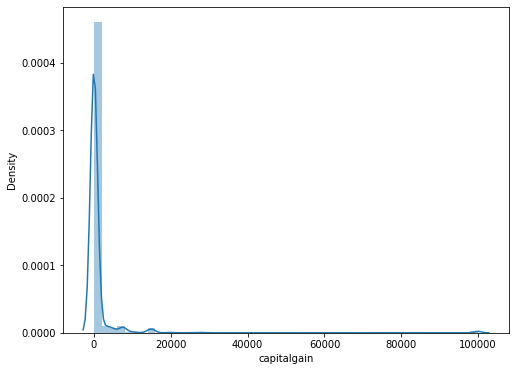

In [ ]:
plt.figure(figsize=(8,6))
sns.distplot(df_train['capitalgain'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


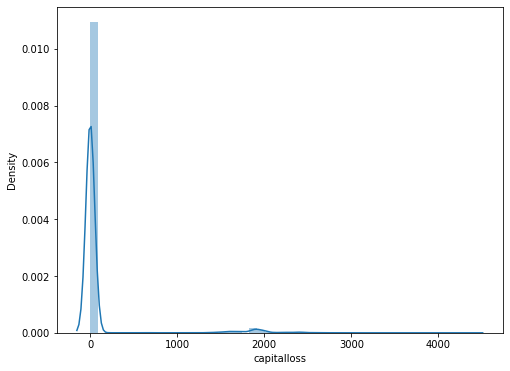

In [ ]:
rcParams['figure.figsize']= 8,6
sns.distplot(df_train['capitalloss'])
plt.show();

In [ ]:
x_train = df_train.drop(labels='Salary', axis=1)
y_train = df_train['Salary']

In [ ]:
x_test = df_test.drop(labels='Salary', axis=1)
y_test = df_test['Salary']

In [ ]:
from sklearn.naive_bayes import MultinomialNB as MB
from sklearn.naive_bayes import GaussianNB as GB

**Multinominal Naive Bayes**

In [ ]:
classifier_mb = MB()
classifier_mb.fit(x_train, y_train)
train_pred = classifier_mb.predict(x_train)
train_accuracy_mb = np.mean(train_pred==y_train)

In [ ]:
test_pred = classifier_mb.predict(x_test)
test_accuracy_mb = np.mean(test_pred==y_test)

print('Train accuracy:',train_accuracy_mb)
print('Test accuracy :', test_accuracy_mb)

Train accuracy: 0.7729186698053778
Test accuracy : 0.7749667994687915


**Gaussian Naive Bayes**

In [ ]:
classifier_gb = GB()
classifier_gb.fit(x_train, y_train)
train_pred = classifier_gb.predict(x_train)
train_accuracy_gb = np.mean(train_pred==y_train)

In [ ]:
test_pred = classifier_gb.predict(x_test)
test_accuracy_gb = np.mean(test_pred==y_test)

print('Train accuracy:',train_accuracy_gb)
print('Test accuracy :', test_accuracy_gb)

Train accuracy: 0.8031563940187659
Test accuracy : 0.8029216467463479


**We can conclude that Gaussian Naive Bayes is giving more accuracy**